In [1]:
import numpy as np
from numpy import zeros,ones,array

import timeit

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [ ]:
def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e
def LUsolve3(c,d,e,b):

    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b
    
def curvatures(xData, yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n + 1)
    e = np.zeros(n)
    k = np.zeros(n + 1)

    # Calcular coeficientes de c, d, e e k
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0 * (xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] = (
        6.0 * (yData[0:n-1] - yData[1:n]) / (xData[0:n-1] - xData[1:n])
        - 6.0 * (yData[1:n] - yData[2:n+1]) / (xData[1:n] - xData[2:n+1])
    )

    LUdecomp3(c, d, e)
    LUsolve3(c, d, e, k)
    return k

def evalSpline(xData, yData, k, x):
    def findSegment(xData, x):
        iLeft = 0
        iRight = len(xData) - 1
        while (iRight - iLeft) > 1:
            i = (iLeft + iRight) // 2  
            if x < xData[i]:
                iRight = i
            else:
                iLeft = i
        return iLeft

    i = findSegment(xData, x)  # Encontrar o segmento onde x está
    h = xData[i + 1] - xData[i]
    y = (
        ((x - xData[i+1]) ** 3 / h - (x - xData[i+1]) * h) * k[i] / 6.0
        - ((x - xData[i]) ** 3 / h - (x - xData[i]) * h) * k[i+1] / 6.0
        + (yData[i] * (x - xData[i+1]) - yData[i+1] * (x - xData[i])) / h
    )
    return y

In [17]:
import time
start_time = time.time()

--- 0.019399299984797835 miliseconds ---
Pontos: 1001


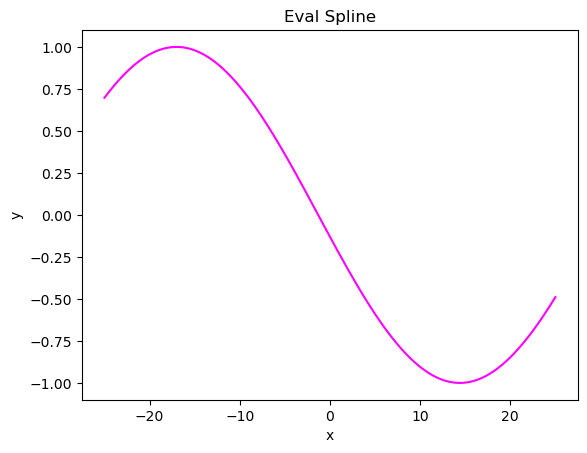

In [21]:
# Função seno
def seno(x, a, b, c):
    return a * np.sin(b*x + c)
#Plotando a função Cubic Spline pronta

x_linear = np.linspace(-25, 25, 10)
y_linear = seno(x_linear, 1, 0.1, 0.13)
X = np.linspace(-25, 25, 1001)
y = seno(X, 1, 0.1, 0.13)

x_data = np.linspace(-25, 25, 1001)
y_data = seno(x_data, 1, 0.1, 0.13)
k = [1 for x in x_data]
y_cs = []

for x in x_data:
    y_cs.append(evalSpline(x_data, y_data, k, x))

#Plotando a função Eval Spline
inicio = timeit.default_timer()
plt.plot(x_data, y_cs, color='magenta')
fim = timeit.default_timer()
plt.title('Eval Spline')
plt.xlabel('x')
plt.ylabel('y')
print(f"--- {fim-inicio} miliseconds ---")
print(f"Pontos: {len(x_data)}");

--- 0.01828290004050359 miliseconds ---
Pontos: 1001


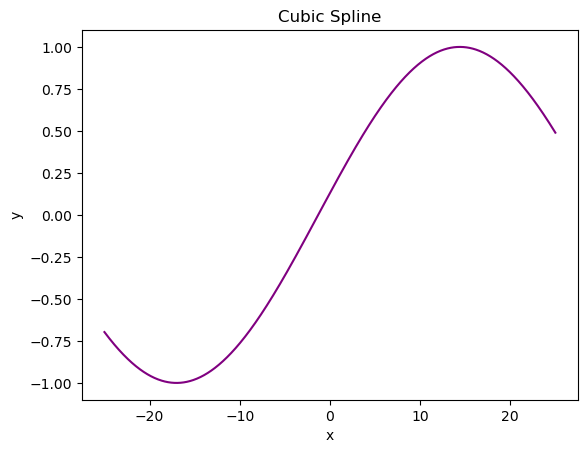

In [25]:
#Plotando a função Cubic Spline pronta
X = np.linspace(-25, 25, 1001)
y = seno(X, 1, 0.1, 0.13)

y_smooth = CubicSpline(X, y)
inicio = timeit.default_timer()
plt.plot(X, y_smooth(X, 0), color='purple')
fim = timeit.default_timer()
plt.title('Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')

print(f"--- {fim-inicio} miliseconds ---")
print(f"Pontos: {len(X)}");

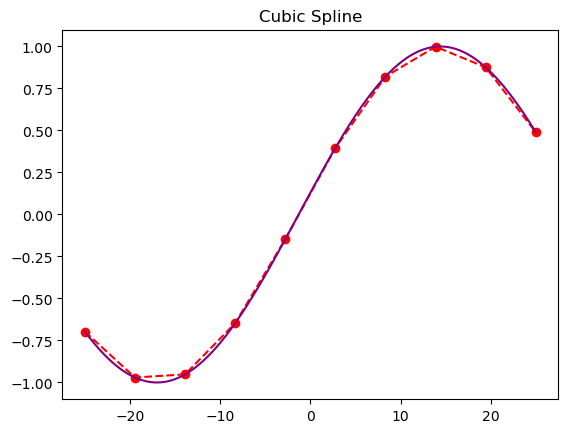

In [42]:
#Plot linear + Cubic spline pronta
x_linear = np.linspace(-25, 25, 10)
y_linear = seno(x_linear, 1, 0.1, 0.13)
plt.plot(x_linear, y_linear, marker='o', linestyle='--', color='red')
plt.plot(X, y_smooth(X, 0), color='purple')
plt.title("Cubic Spline");

Fazendo uma função para calcular tempo por quantidade de pontos

In [38]:
def tempos(N):
    t_es = []
    t_cs = []
    for n in N:
 # Eval Spline
        inicio_1 = timeit.default_timer()
        plt.plot(x_data, y_cs)
        fim_1 = timeit.default_timer()
        t_es.append(fim_1-inicio_1)

 # Cubic Splice
        inicio_2 = timeit.default_timer()
        plt.plot(X, y_smooth(X, 0))
        fim_2 = timeit.default_timer()
        t_cs.append(fim_2-inicio_2)

    return (t_es, t_cs)

N=np.linspace(0,100001,100)
t1, t2 = tempos(N)
plt.close()

Tempo médio Eval Spline: 0.0007444910064805299
Tempo médio Cubic Spline: 0.0005851259961491451


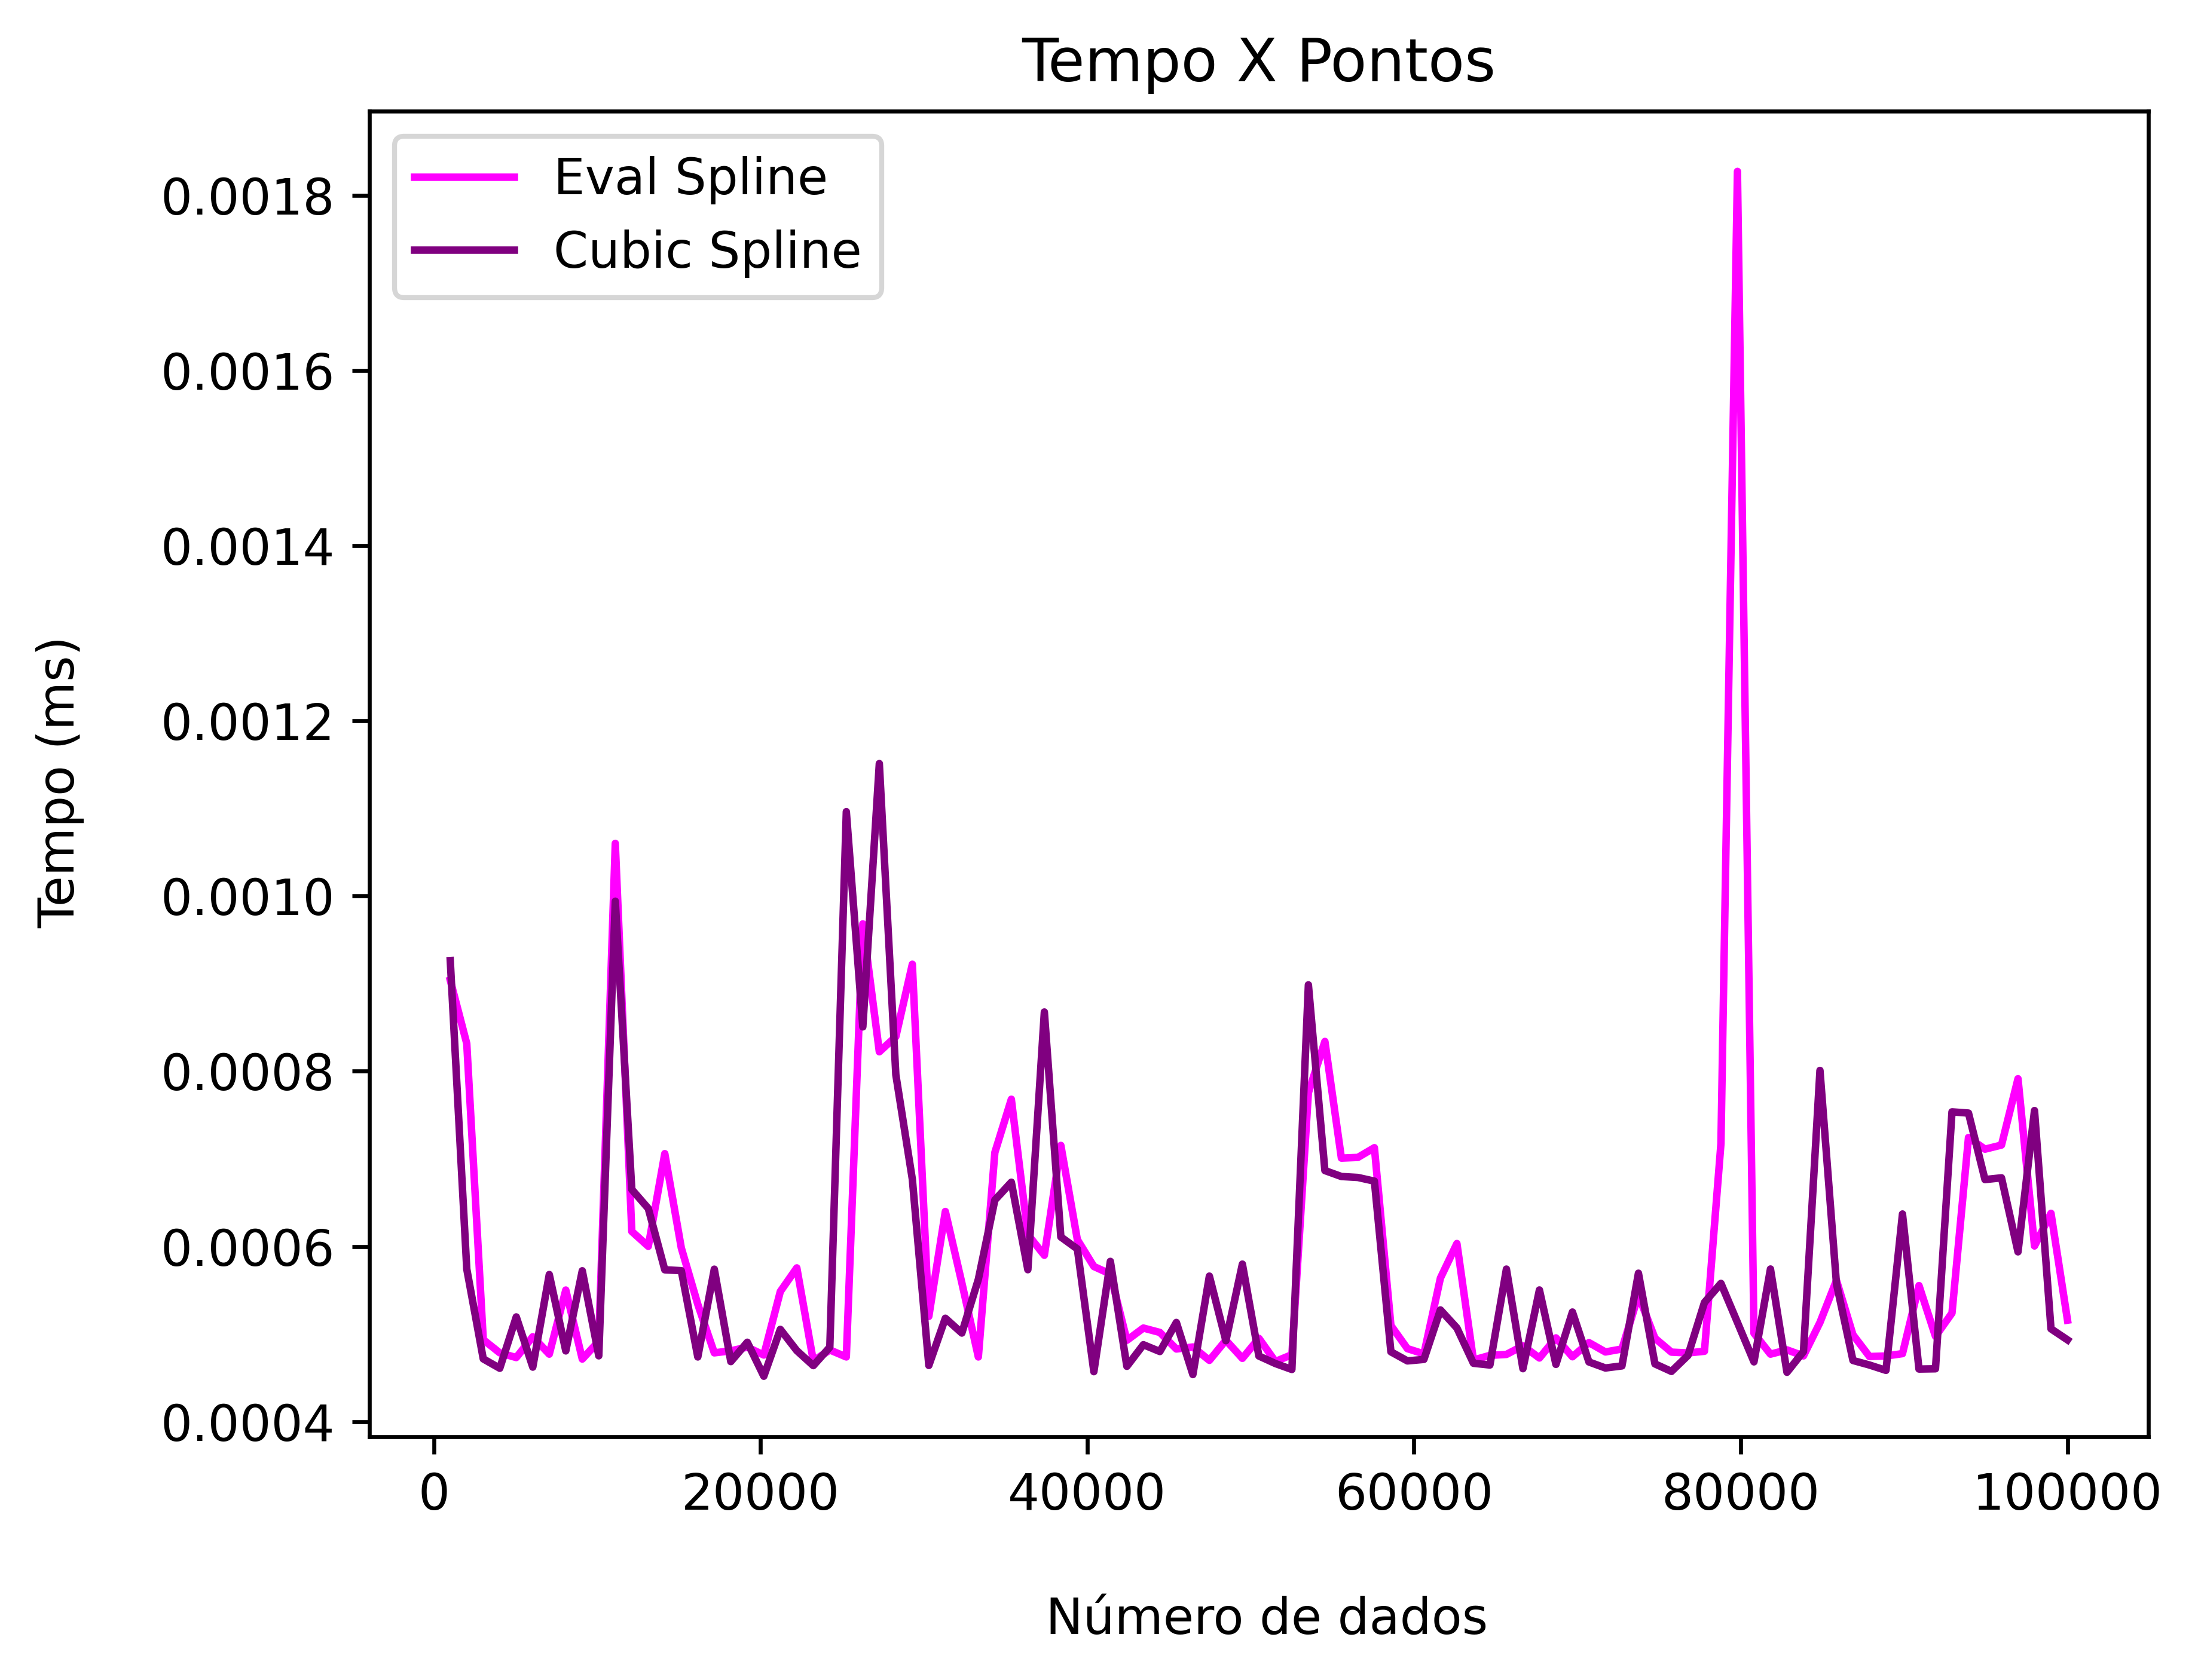

In [40]:
plt.figure(dpi=600)

plt.plot(N[1:], t1[1:], color='magenta', label = 'Eval Spline')
plt.plot(N[1:], t2[1:], color='purple', label = 'Cubic Spline')
plt.legend()
plt.title('Tempo X Pontos')
plt.xlabel('\n Número de dados')
plt.ylabel('Tempo (ms) \n');

print(f'Tempo médio Eval Spline: {np.mean(t1)}')
print(f'Tempo médio Cubic Spline: {np.mean(t2)}')